In [1]:
import sys
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install mplleaflet
!{sys.executable} -m pip install bs4
!{sys.executable} -m pip install geocoder
!{sys.executable} -m pip install geopy
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install lxml
!{sys.executable} -m pip install pygeoj
!{sys.executable} -m pip install pyshp
!{sys.executable} -m pip install datetime
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install --upgrade cython

In [2]:
!{sys.executable} -m pip install statsmodels

In [3]:
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install descartes
!{sys.executable} -m pip install requests

In [4]:
!{sys.executable} -m pip install pandana

In [5]:
!{sys.executable} -m pip install xgboost

In [6]:
%matplotlib inline

# general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Geographical analysis
import geopandas as gpf #libspatialindex nees to be installed first
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import shapefile as shp
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import requests
import descartes

# accessibility analysis
import time
from pandana.loaders import osm
from pandana.loaders import pandash5

# modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot preference
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

print('Libraries imported.')

Libraries imported.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
url = "http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-12-24/data/listings.csv.gz"
df = pd.read_csv(url)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20211224070558,2021-12-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,4.90,4.76,4.66,NaN,f,1,1,0,0,1.92
1,24480,https://www.airbnb.com/rooms/24480,20211224070558,2021-12-25,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,4.90,4.97,4.58,NaN,f,1,1,0,0,0.62
2,25026,https://www.airbnb.com/rooms/25026,20211224070558,2021-12-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,...,4.90,4.81,4.56,NaN,f,1,1,0,0,1.69
3,35636,https://www.airbnb.com/rooms/35636,20211224070558,2021-12-26,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,4.88,4.90,4.65,NaN,f,1,1,0,0,1.82
4,35764,https://www.airbnb.com/rooms/35764,20211224070558,2021-12-25,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,4.94,4.94,4.87,NaN,f,1,1,0,0,2.76


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24549 entries, 0 to 24548
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24549 non-null  int64  
 1   listing_url                                   24549 non-null  object 
 2   scrape_id                                     24549 non-null  int64  
 3   last_scraped                                  24549 non-null  object 
 4   name                                          24528 non-null  object 
 5   description                                   23336 non-null  object 
 6   neighborhood_overview                         13212 non-null  object 
 7   picture_url                                   24549 non-null  object 
 8   host_id                                       24549 non-null  int64  
 9   host_url                                      24549 non-null 

In [9]:
# criando um dataframe com dados nulos, tipo de dados e valores unicos 
pd.DataFrame({'valores_nulos':np.round(df.isnull().mean(), 2), 
              'tipo_dados': df.dtypes, 
              'valores_unicos': df.nunique()})

,valores_nulos,tipo_dados,valores_unicos
id,0.00,int64,24549
listing_url,0.00,object,24549
scrape_id,0.00,int64,1
last_scraped,0.00,object,2
name,0.00,object,23816
...,...,...,...
calculated_host_listings_count,0.00,int64,46
calculated_host_listings_count_entire_homes,0.00,int64,47
calculated_host_listings_count_private_rooms,0.00,int64,14
calculated_host_listings_count_shared_rooms,0.00,int64,10


In [10]:
# convertendo variáveis
df['host_id'] = df.host_id.astype('category')
df['last_review'] = pd.to_datetime(df.last_review)

In [11]:
# plotando o gráfico de densidade
# definindo as colunas numéricas
columns_list = ['price', 'minimum_nights', 'number_of_reviews', 
                'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# criando objeto para número de linhas e colunas
nrows = 2
ncols = 3

In [12]:
# criando um novo objeto somente para dados numéricos
df_num = df[columns_list]

# removendo os outliers do dataframe principal
df_new = df.loc[df_num.index.tolist()]

# checando a nova dimensão do dataset
df_new.shape

(24549, 74)

In [13]:
# removendo a coluna sem dados
df_new.drop('neighbourhood_group_cleansed', axis=1, inplace=True)

In [14]:
print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:5]

15


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
379,716516,https://www.airbnb.com/rooms/716516,20211224070558,2021-12-26,FANTASTIC ARTISTIC 3 BDR GÁVEA best,"Very spacious, charming and remodeled 3 bedroo...",O Baixo Gávea é um dos points mais tradiciona...,https://a0.muscache.com/pictures/50b02633-cf84...,3665789,https://www.airbnb.com/users/show/3665789,...,4.86,4.71,4.57,NaN,f,5,5,0,0,0.53
3224,5139274,https://www.airbnb.com/rooms/5139274,20211224070558,2021-12-26,IPNEMA AMAZING LOCATION 3 Bdr,3 quartos 1 suite - aproximadamente 130m / 01 ...,Lagoon is magic! But with Ipanema in 500m is m...,https://a0.muscache.com/pictures/a3ad70af-9a0b...,3665789,https://www.airbnb.com/users/show/3665789,...,5.00,5.00,4.33,NaN,f,5,5,0,0,0.04
3986,8548823,https://www.airbnb.com/rooms/8548823,20211224070558,2021-12-26,CASA LUXO - BARRA TIJUCA - OLIMPIAD,OLIMPÍADAS - TEMPORADA - CASA DE LUXO - BARRA ...,NaN,https://a0.muscache.com/pictures/108622115/eb3...,44994758,https://www.airbnb.com/users/show/44994758,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
5258,11466657,https://www.airbnb.com/rooms/11466657,20211224070558,2021-12-26,Equipped 2 bdr next to the beach!,Very nice 2 bedroom (1 suite); wifi; AC; livin...,NaN,https://a0.muscache.com/pictures/54b586d7-92af...,3665789,https://www.airbnb.com/users/show/3665789,...,5.00,5.00,4.00,NaN,f,5,5,0,0,0.02
5683,12378552,https://www.airbnb.com/rooms/12378552,20211224070558,2021-12-26,Trendy comphy 2 bedrooms in Rio,Welcome to your home in Rio!<br />Great locati...,The São Salvador Square is located between Fla...,https://a0.muscache.com/pictures/cb897d90-988d...,4835601,https://www.airbnb.com/users/show/4835601,...,5.00,5.00,4.61,NaN,f,1,1,0,0,0.46


In [15]:
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 
         'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
         'calculated_host_listings_count_shared_rooms', 'neighbourhood_group_cleansed'], axis=1, inplace=True)

In [16]:
sum((df.minimum_nights == df.minimum_minimum_nights) == False)

1580

In [17]:
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
         'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

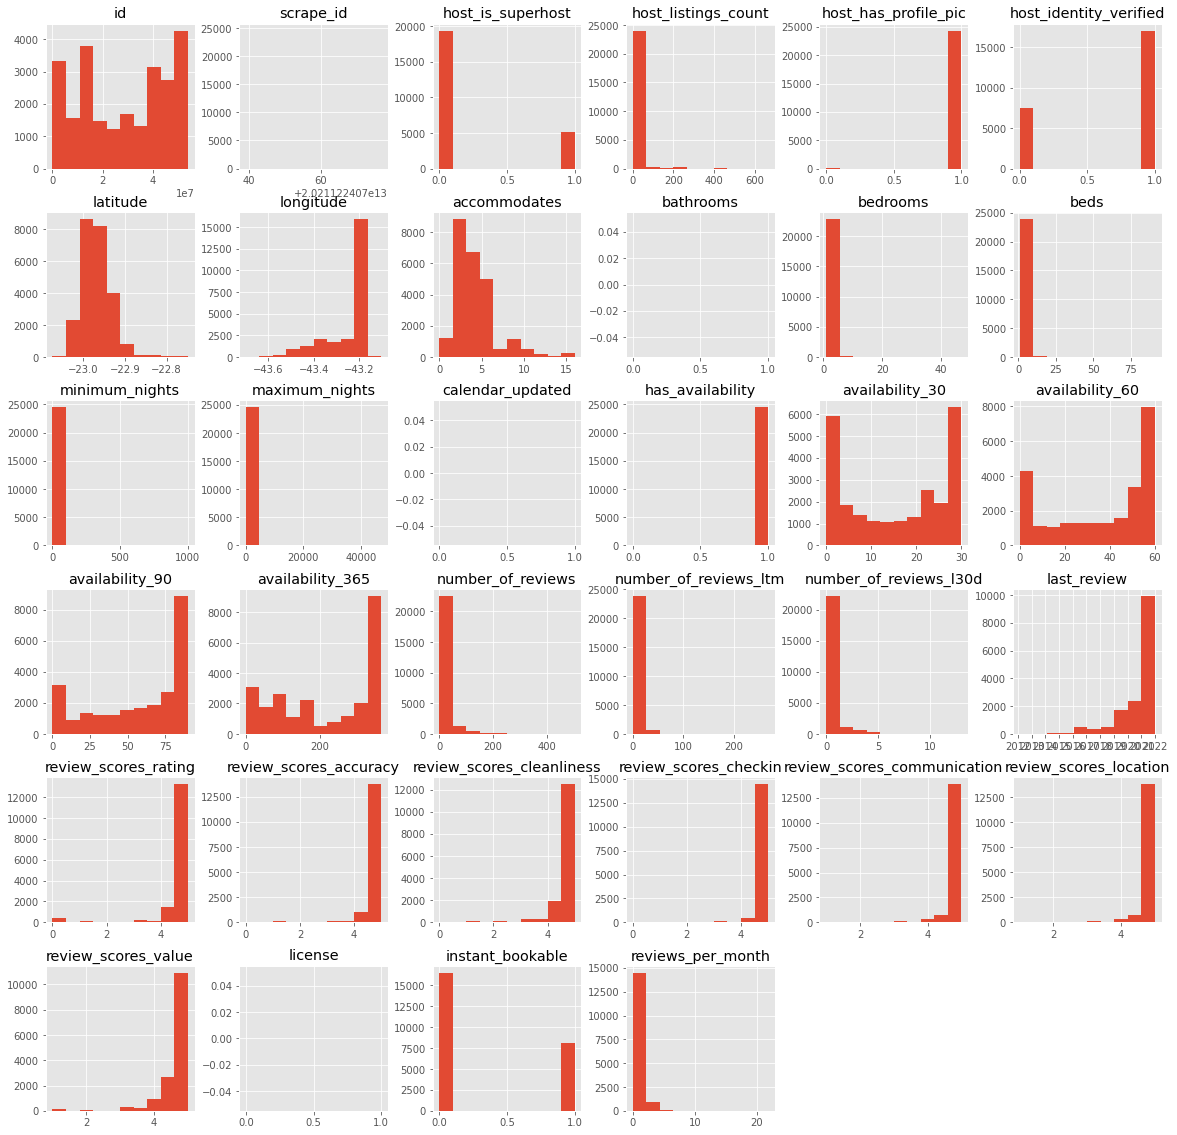

In [18]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

In [19]:
#df.drop(['has_availability', 'host_has_profile_pic'], axis=1, inplace=True)

In [20]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (pd.datetime(2019, 7, 21) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)


Mean days as host: 1183.0
Median days as host: 1216.0


In [21]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

# Number of rows without a value for host_response_time which have also not yet had a review
len(df[df.loc[ :,['host_response_time', 'first_review'] ].isnull().sum(axis=1) == 2])

Null values: 3881
Proportion: 15.8%


2640

In [22]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.360381
within a few hours    0.195568
unknown               0.158092
within a day          0.144079
a few days or more    0.141880
Name: host_response_time, dtype: float64

In [23]:
df.host_response_time.value_counts(normalize=True)

within an hour        0.360381
within a few hours    0.195568
unknown               0.158092
within a day          0.144079
a few days or more    0.141880
Name: host_response_time, dtype: float64

In [24]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 3881
Proportion: 15.8%


In [25]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 79.0
Median host response rate: 100.0
Proportion of 100% host response rates: 52.2%


In [26]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       10782
0-49%       3907
unknown     3881
50-89%      3639
90-99%      2340
Name: host_response_rate, dtype: int64

In [27]:
# Number of rows without a value for multiple host-related columns
len(df[df.loc[ :,['host_since', 'host_is_superhost', 'host_listings_count', 
                  'host_has_profile_pic', 'host_identity_verified'] ].isnull().sum(axis=1) == 5])

15

In [28]:
df.dropna(subset=['host_since'], inplace=True)

In [29]:
df.property_type.value_counts()

Entire rental unit                  14145
Private room in rental unit          3235
Entire condominium (condo)           1561
Entire residential home              1109
Private room in residential home     1001
                                    ...  
Houseboat                               1
Entire bed and breakfast                1
Treehouse                               1
Private room in treehouse               1
Cave                                    1
Name: property_type, Length: 82, dtype: int64

In [30]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [31]:
# Example of amenities listed
df.amenities[:1].values

array(['["Bed linens", "Stove", "Elevator", "Cable TV", "Microwave", "Cooking basics", "Kitchen", "Luggage dropoff allowed", "Refrigerator", "Dedicated workspace", "Air conditioning", "Coffee maker", "Hot tub", "Iron", "Building staff", "Essentials", "Paid parking off premises", "Long term stays allowed", "TV with standard cable", "Hair dryer", "Dishes and silverware", "Oven", "Private entrance", "Wifi", "Patio or balcony", "Hot water", "Hangers"]'],
      dtype=object)

In [32]:
df.columns[40:]

Index(['calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month', 'host_days_active'],
      dtype='object')

In [33]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

In [34]:
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

In [35]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 36.5%
Null values in 'review_scores_rating': 36.5%


In [36]:
df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (pd.datetime(2019, 4, 9) - df.first_review).astype('timedelta64[D]')

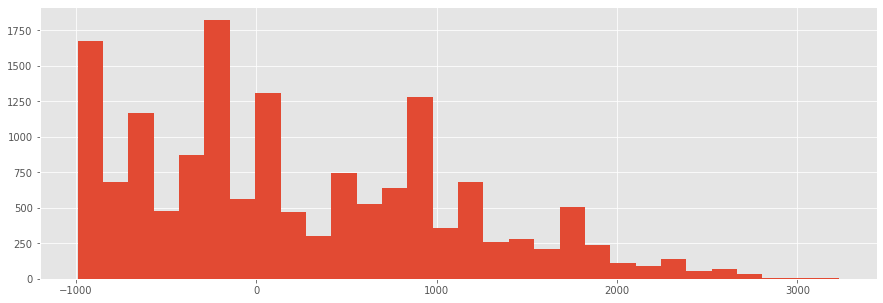

In [37]:
# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30);

In [38]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [39]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

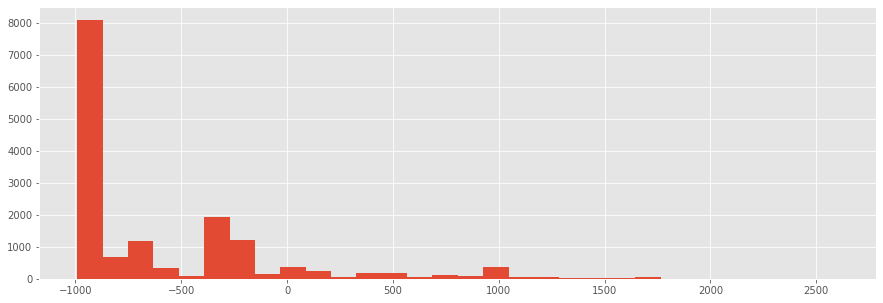

In [40]:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (pd.datetime(2019, 4, 9) - df.last_review).astype('timedelta64[D]')

# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [41]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [42]:
# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop('last_review', axis=1, inplace=True)

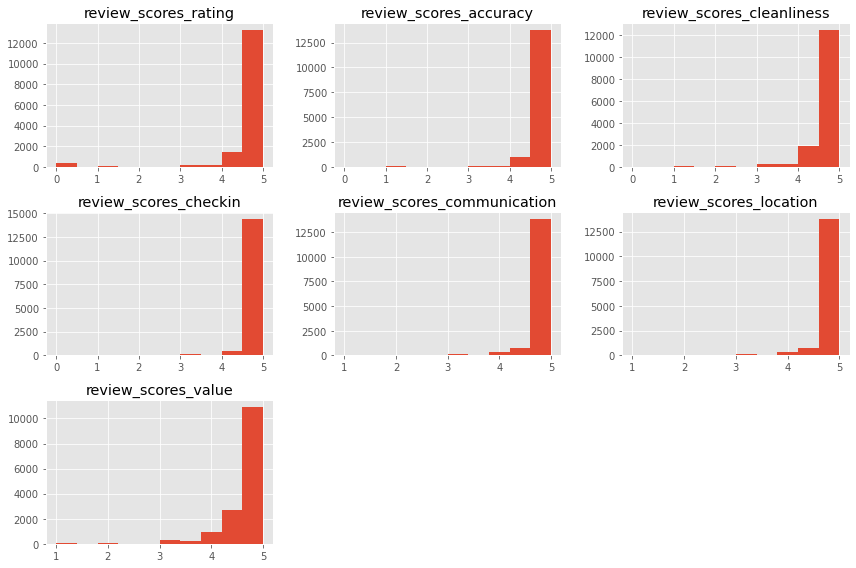

In [43]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [44]:
# Creating a list of all review columns that are scored out of 5
variables_to_plot.pop(0)

'review_scores_rating'

In [45]:
 #Save cleaned dataset
listings_cleaned = df.to_csv(r'/content/listings_cleaned.csv', index=id, header=True)

#Análise Exploratória

In [46]:
df = pd.read_csv('/content/listings_cleaned.csv', index_col=0)

In [47]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])

In [48]:
print(f"Of the Airbnb hosts that are still listing on the site, the first joined on {min(df.host_since).strftime('%d %B %Y')}, and the most recent joined on {max(df.host_since).strftime('%d %B %Y')}.")



Of the Airbnb hosts that are still listing on the site, the first joined on 13 October 2008, and the most recent joined on 22 December 2021.


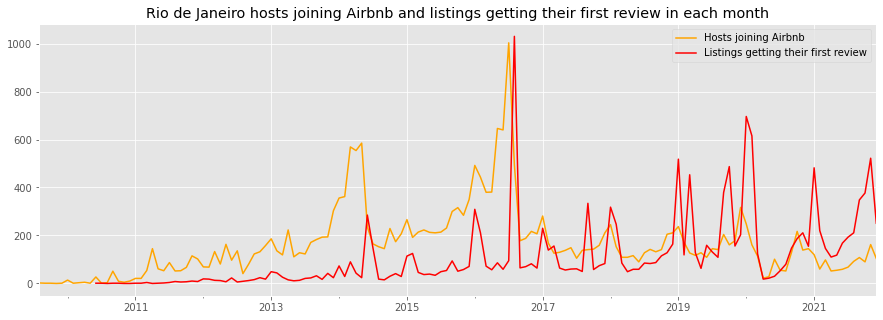

In [49]:
plt.figure(figsize=(15,5))
df.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
df.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='red')
plt.title('Rio de Janeiro hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2009-08-21', '2021-12-22') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

In [50]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(df.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(df.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)

In [51]:
def decompose_time_series(df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(df)
    
    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

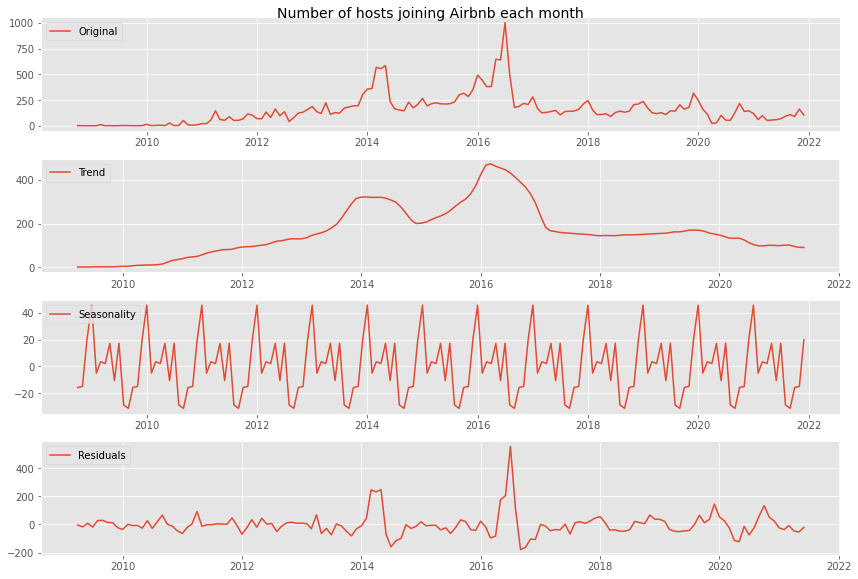

In [52]:
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

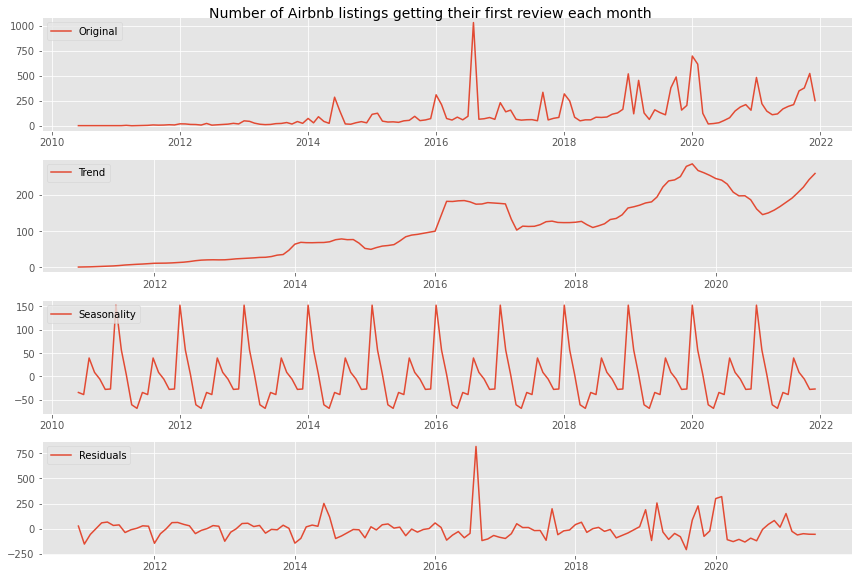

In [53]:
decompose_time_series(ts_first_review, title='Number of Airbnb listings getting their first review each month')

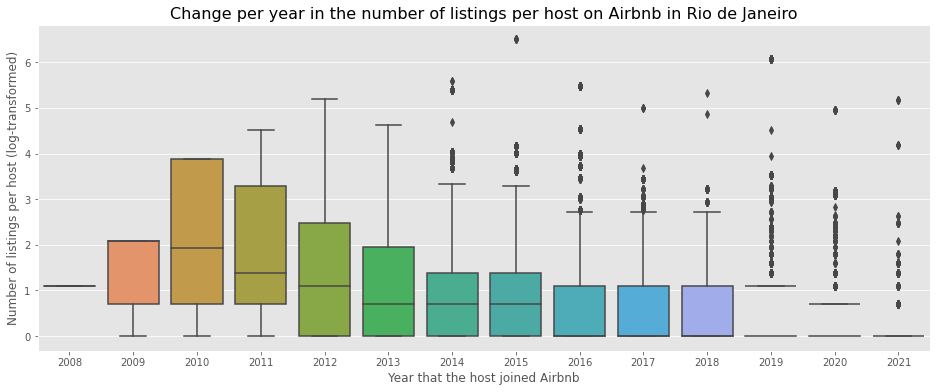

In [54]:
plt.figure(figsize=(16,6))
sns.boxplot(df.host_since.dt.year, np.log(df.host_listings_count))
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host (log-transformed)', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb in Rio de Janeiro', fontsize=16)
plt.show()

In [55]:
# List of the largest host_listings_count and the year the host joined Airbnb
df.sort_values('host_listings_count').drop_duplicates('host_listings_count',keep='last').tail(10)[['host_since', 'host_listings_count']]

,host_since,host_listings_count
21060,2020-10-22,142.0
17984,2017-06-19,148.0
23528,2021-03-04,175.0
23999,2012-09-27,181.0
21006,2018-01-09,208.0
11693,2014-10-21,222.0
18789,2016-08-24,239.0
19366,2014-11-20,265.0
21543,2019-12-20,437.0
19954,2015-04-26,666.0


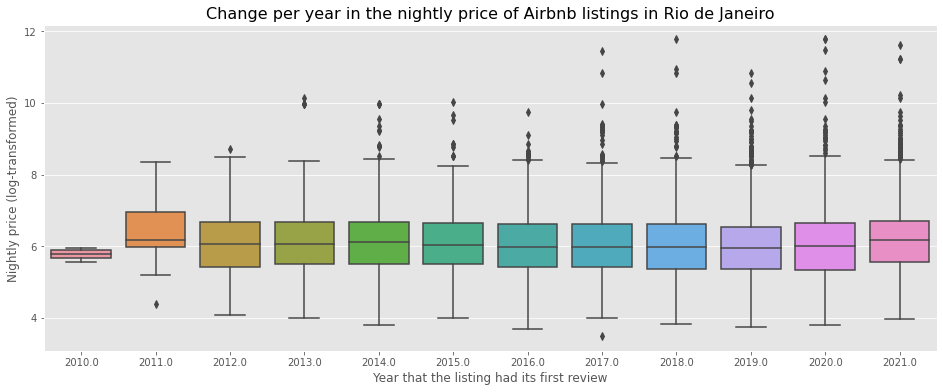

In [56]:
plt.figure(figsize=(16,6))
sns.boxplot(df.first_review.dt.year, np.log(df.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in Rio de Janeiro', fontsize=16)
plt.show()

In [57]:
# Dropping host_since and first_review as they are no longer needed
df.drop(['host_since', 'first_review'], axis=1, inplace=True)

In [58]:
df.describe()

,id,scrape_id,host_id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,host_days_active
count,2.453400e+04,2.453400e+04,2.453400e+04,24534.000000,24534.000000,24534.000000,24534.000000,24534.000000,24534.000000,24534.000000,...,15205.000000,15205.000000,15205.000000,15206.000000,15204.000000,15206.000000,0.0,24534.000000,15579.000000,24534.000000
mean,2.872418e+07,2.021122e+13,1.114101e+08,0.209913,8.311771,0.992867,0.695321,-22.966475,-43.247651,4.174574,...,4.784915,4.679271,4.869396,4.850622,4.852236,4.649829,NaN,0.327872,0.692185,1183.479172
std,1.779529e+07,1.147289e+01,1.217712e+08,0.407254,30.577741,0.084157,0.460281,0.035109,0.096648,2.488135,...,0.474962,0.548085,0.394763,0.415319,0.379636,0.503681,NaN,0.469447,0.935665,938.093701
min,1.787800e+04,2.021122e+13,3.607000e+03,0.000000,0.000000,0.000000,0.000000,-23.072670,-43.698710,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.010000,-885.000000
25%,1.316785e+07,2.021122e+13,1.476687e+07,0.000000,1.000000,1.000000,0.000000,-22.984730,-43.299845,2.000000,...,4.770000,4.600000,4.890000,4.870000,4.860000,4.540000,NaN,0.000000,0.090000,546.000000
50%,3.067385e+07,2.021122e+13,6.394602e+07,0.000000,1.000000,1.000000,1.000000,-22.972390,-43.195790,4.000000,...,4.950000,4.860000,5.000000,5.000000,5.000000,4.770000,NaN,0.000000,0.310000,1216.000000
75%,4.581584e+07,2.021122e+13,1.691575e+08,0.000000,4.000000,1.000000,1.000000,-22.953280,-43.185980,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,1.000000,0.970000,1911.000000
max,5.396781e+07,2.021122e+13,4.370829e+08,1.000000,666.000000,1.000000,1.000000,-22.749690,-43.104400,16.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,1.000000,21.790000,3933.000000


In [59]:
print(f"Advertised prices range from R${min(df.price)} to R${max(df.price)}.")

Advertised prices range from R$0 to R$650476.


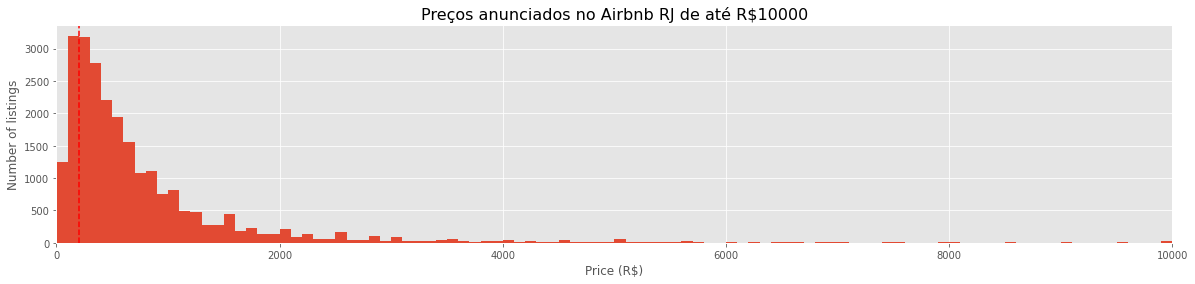

In [60]:
# Distribution of prices from R$0 to R$10000
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(0,10000))
plt.margins(x=0)
plt.axvline(200, color='red', linestyle='--')
plt.title("Preços anunciados no Airbnb RJ de até R$10000", fontsize=16)
plt.xlabel("Price (R$)")
plt.ylabel("Number of listings")
plt.show()

In [61]:
print("Mediana do número de anúncios por host:", int(df.host_listings_count.median()))
print("Média do número de anúncios por host:", int(round(df.host_listings_count.mean())))
print("Maior número de anúncios por host:", int(round(df.host_listings_count.max())))
print(f"{int(round(100*len(df[df.host_listings_count == 1])/len(df)))}% of listings are from hosts with one listing.")

Mediana do número de anúncios por host: 1
Média do número de anúncios por host: 8
Maior número de anúncios por host: 666
36% of listings are from hosts with one listing.


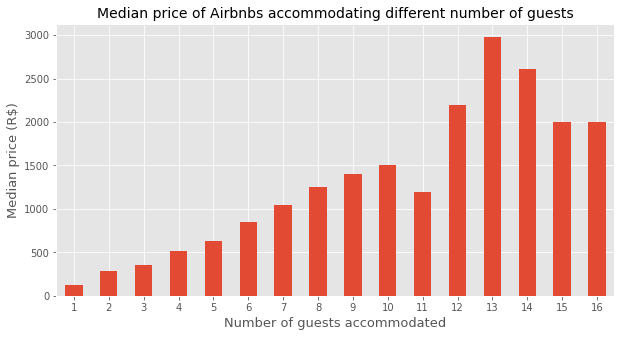

In [62]:
plt.figure(figsize=(10,5))
df.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price (R$)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

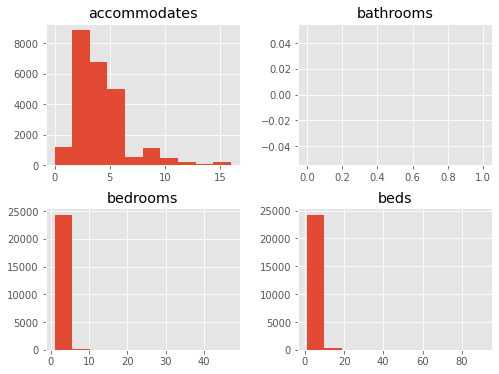

In [63]:
df[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

In [64]:
# Renaming the neighbourhood column
df.rename(columns={'neighbourhood_cleansed': 'borough'}, inplace=True)

# Importing the Edinburgh borough boundary GeoJSON file as a dataframe in geopandas
map_df = gpf.read_file(r'/content/Limite_Bairro.geojson')
map_df.head()

,OBJECTID,Área,NOME,REGIAO_ADM,AREA_PLANE,CODBAIRRO,CODRA,CODBNUM,LINK,RP,Cod_RP,CODBAIRRO_LONG,SHAPESTArea,SHAPESTLength,geometry
0,325,1.705685e+06,Paquetá,PAQUETA,1,013,21,13,Paqueta&area=013 ...,Centro,1.1,13,1.705685e+06,24841.426669,"MULTIPOLYGON (((-43.10567 -22.74888, -43.10568..."
1,326,4.056403e+06,Freguesia (Ilha),ILHA DO GOVERNADOR,3,098,20,98,Freguesia (Ilha) &area=98 ...,Ilha do Governador,3.7,98,4.056403e+06,18303.595717,"MULTIPOLYGON (((-43.17170 -22.77661, -43.17170..."
2,327,9.780465e+05,Bancários,ILHA DO GOVERNADOR,3,097,20,97,Bancários &area=97 ...,Ilha do Governador,3.7,97,9.780465e+05,7758.781282,"MULTIPOLYGON (((-43.18915 -22.78318, -43.18915..."
3,328,1.895742e+07,Galeão,ILHA DO GOVERNADOR,3,104,20,104,Galeão &area=104 ...,Ilha do Governador,3.7,104,1.895742e+07,21510.059220,"MULTIPOLYGON (((-43.22804 -22.78374, -43.22811..."
4,329,1.672546e+06,Tauá,ILHA DO GOVERNADOR,3,101,20,101,Tauá &area=101 ...,Ilha do Governador,3.7,101,1.672546e+06,8246.109606,"POLYGON ((-43.18039 -22.79940, -43.18022 -22.7..."


In [65]:
# Creating a dataframe of listing counts and median price by borough
borough_df = pd.DataFrame(df.groupby('borough').size())
borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
borough_df['median_price'] = df.groupby('borough').price.median().values

# Joining the dataframes
borough_map_df = map_df.set_index('RP').join(borough_df)

borough_map_df.head()

,OBJECTID,Área,NOME,REGIAO_ADM,AREA_PLANE,CODBAIRRO,CODRA,CODBNUM,LINK,Cod_RP,CODBAIRRO_LONG,SHAPESTArea,SHAPESTLength,geometry,number_of_listings,median_price
Bangu,366,1.075671e+07,Vila Militar,REALENGO,5,135,33,135,Vila Militar &area=135 ...,5.1,135,1.075671e+07,18076.999068,"POLYGON ((-43.41103 -22.84069, -43.41129 -22.8...",11.0,165.0
Bangu,370,2.605420e+07,Realengo,REALENGO,5,139,33,139,Realengo &area=139 ...,5.1,139,2.605420e+07,30896.825287,"POLYGON ((-43.43513 -22.84189, -43.43512 -22.8...",11.0,165.0
Bangu,378,4.865792e+06,Padre Miguel,BANGU,5,140,17,140,Padre Miguel &area=140 ...,5.1,140,4.865792e+06,16274.188523,"POLYGON ((-43.44555 -22.87533, -43.44570 -22.8...",11.0,165.0
Bangu,388,1.975949e+06,Magalhães Bastos,REALENGO,5,138,33,138,Magalhães Bastos &area=138 ...,5.1,138,1.975949e+06,6902.654710,"POLYGON ((-43.40925 -22.88268, -43.40919 -22.8...",11.0,165.0
Bangu,389,1.690860e+07,Senador Camará,BANGU,5,142,17,142,Senador Camará &area=142 ...,5.1,142,1.690860e+07,25798.207466,"POLYGON ((-43.49686 -22.86463, -43.49735 -22.8...",11.0,165.0


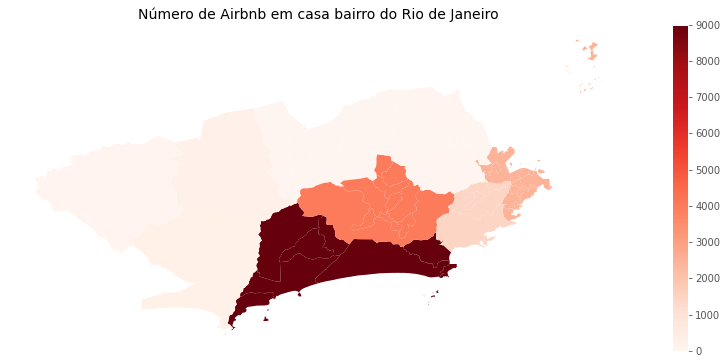

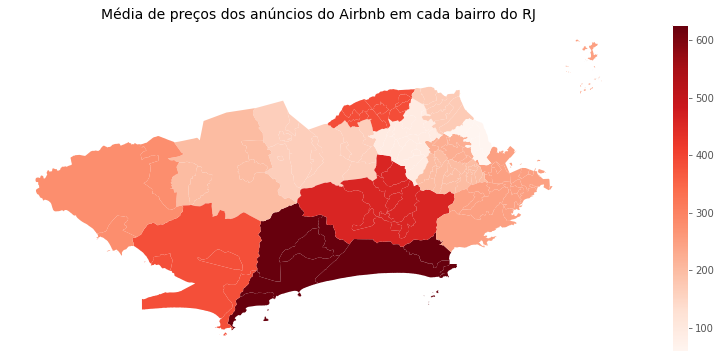

In [66]:
# Plotting the number of listings in each borough
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='number_of_listings', cmap='Reds', ax=ax1)
ax1.axis('off')
ax1.set_title('Número de Airbnb em casa bairro do Rio de Janeiro', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='median_price', cmap='Reds', ax=ax2)
ax2.axis('off')
ax2.set_title('Média de preços dos anúncios do Airbnb em cada bairro do RJ', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

In [67]:
import plotly.express as px

#plotando o mapa
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="borough", color_discrete_sequence=["red"], 
                        zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

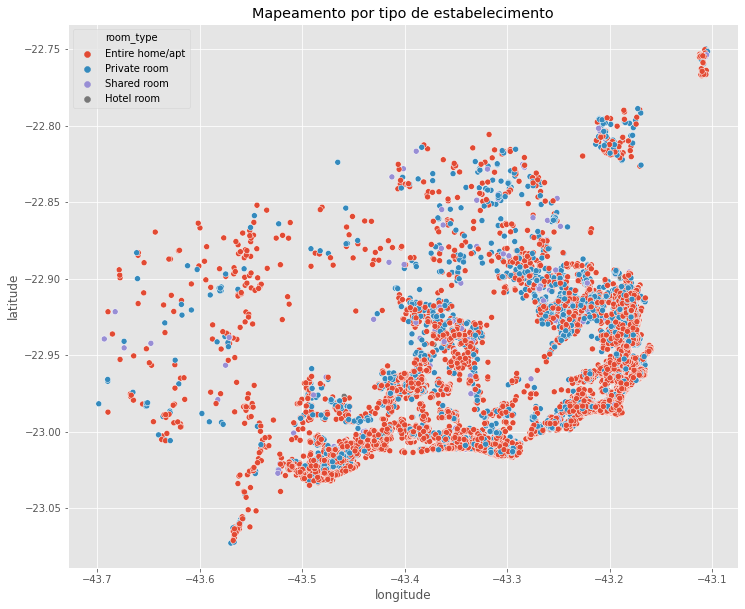

In [68]:
# defining plot area
fig, ax = plt.subplots(figsize = (12,10))

# plotting 
ax = sns.scatterplot(data=df, y="latitude", x="longitude", hue='room_type')
ax.set_title('Mapeamento por tipo de estabelecimento')
plt.show()

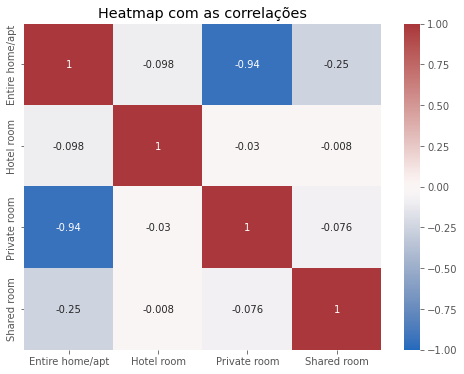

In [69]:
df_dummies = pd.get_dummies(df_new['room_type'])
df_new_dummies = pd.concat([df_new['price'], df_dummies], axis=1)


# definindo a área de plotagem
plt.figure(figsize=(8, 6))

# plotando o gráfico
sns.heatmap(df_new_dummies.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
plt.title('Heatmap com as correlações')
plt.show()

In [70]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

In [71]:
print(f'A média geral de preços é: R${df.price.mean():.2f}')

A média geral de preços é: R$1029.35


In [72]:
médias_por_região = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
médias_por_região 

neighbourhood
Copacaban, Rio de Janeiro, Brazil          4207.000000
Rio de Janeiro, Barra da Tijuca, Brazil    3810.000000
Rio de janeiro, Rio de Janeiro, Brazil     3611.687500
Joá, Rio de Janeiro, Brazil                3516.392857
Rio de Janeiro,, Rio de Janeiro, Brazil    3117.000000
                                              ...     
Paraty, Brazil                               60.000000
Vista Alegre, Rio de Janeiro, Brazil         60.000000
Vila Cosmos, Rio de Janeiro, Brazil          60.000000
Grajaú, Rio de Janeiro, Brazil               60.000000
Gambôa, Rio de Janeiro, Brazil               60.000000
Name: price, Length: 258, dtype: float64

In [73]:
#médias_por_bairro = df.groupby('borough')['price'].mean().sort_values(ascending=False)
#médias_por_bairro

In [74]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());


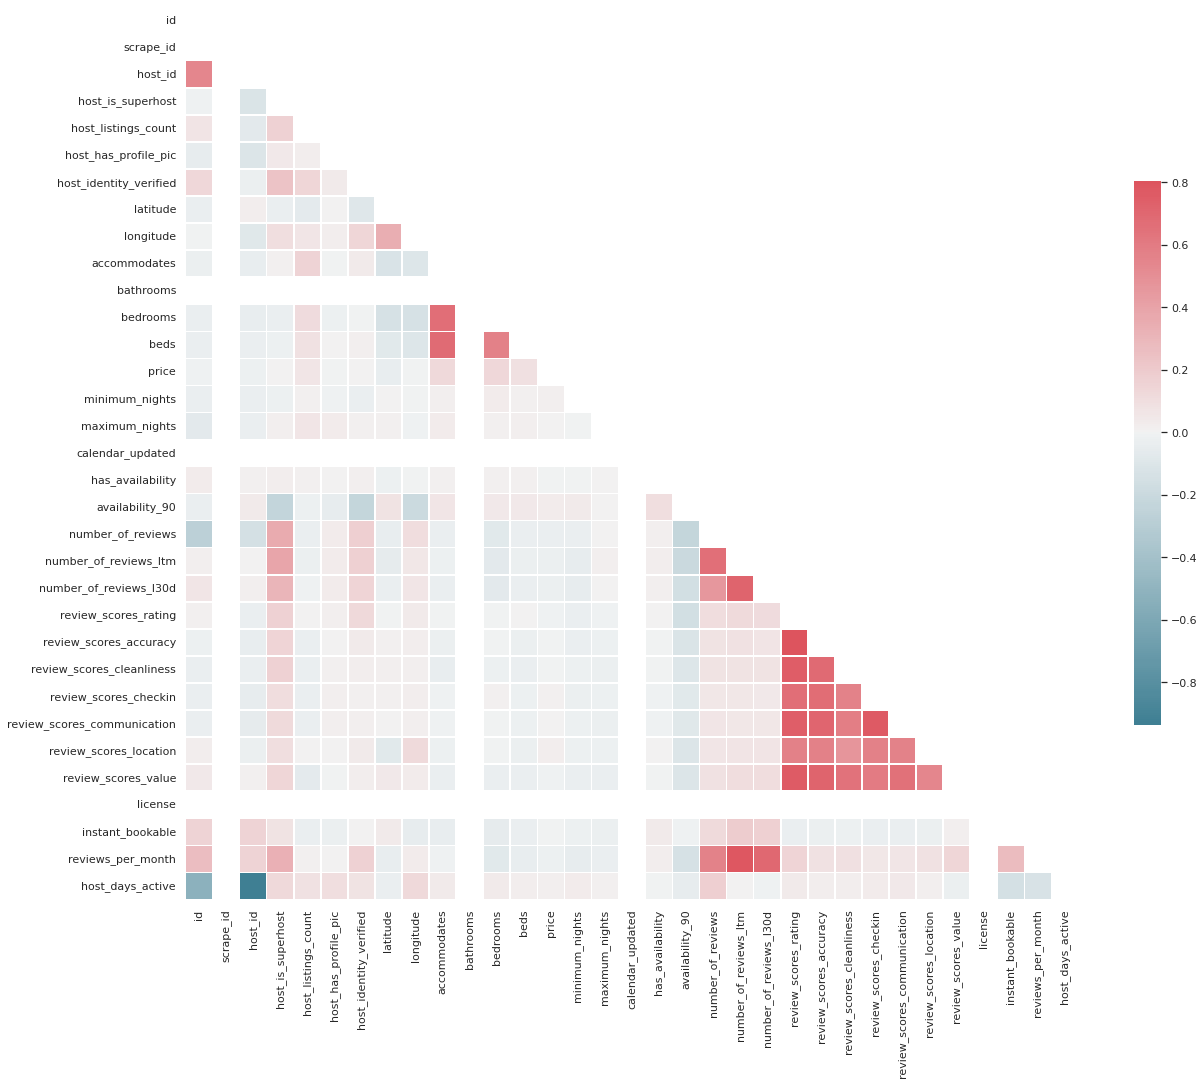

In [75]:
multi_collinearity_heatmap(df, figsize=(20,20))

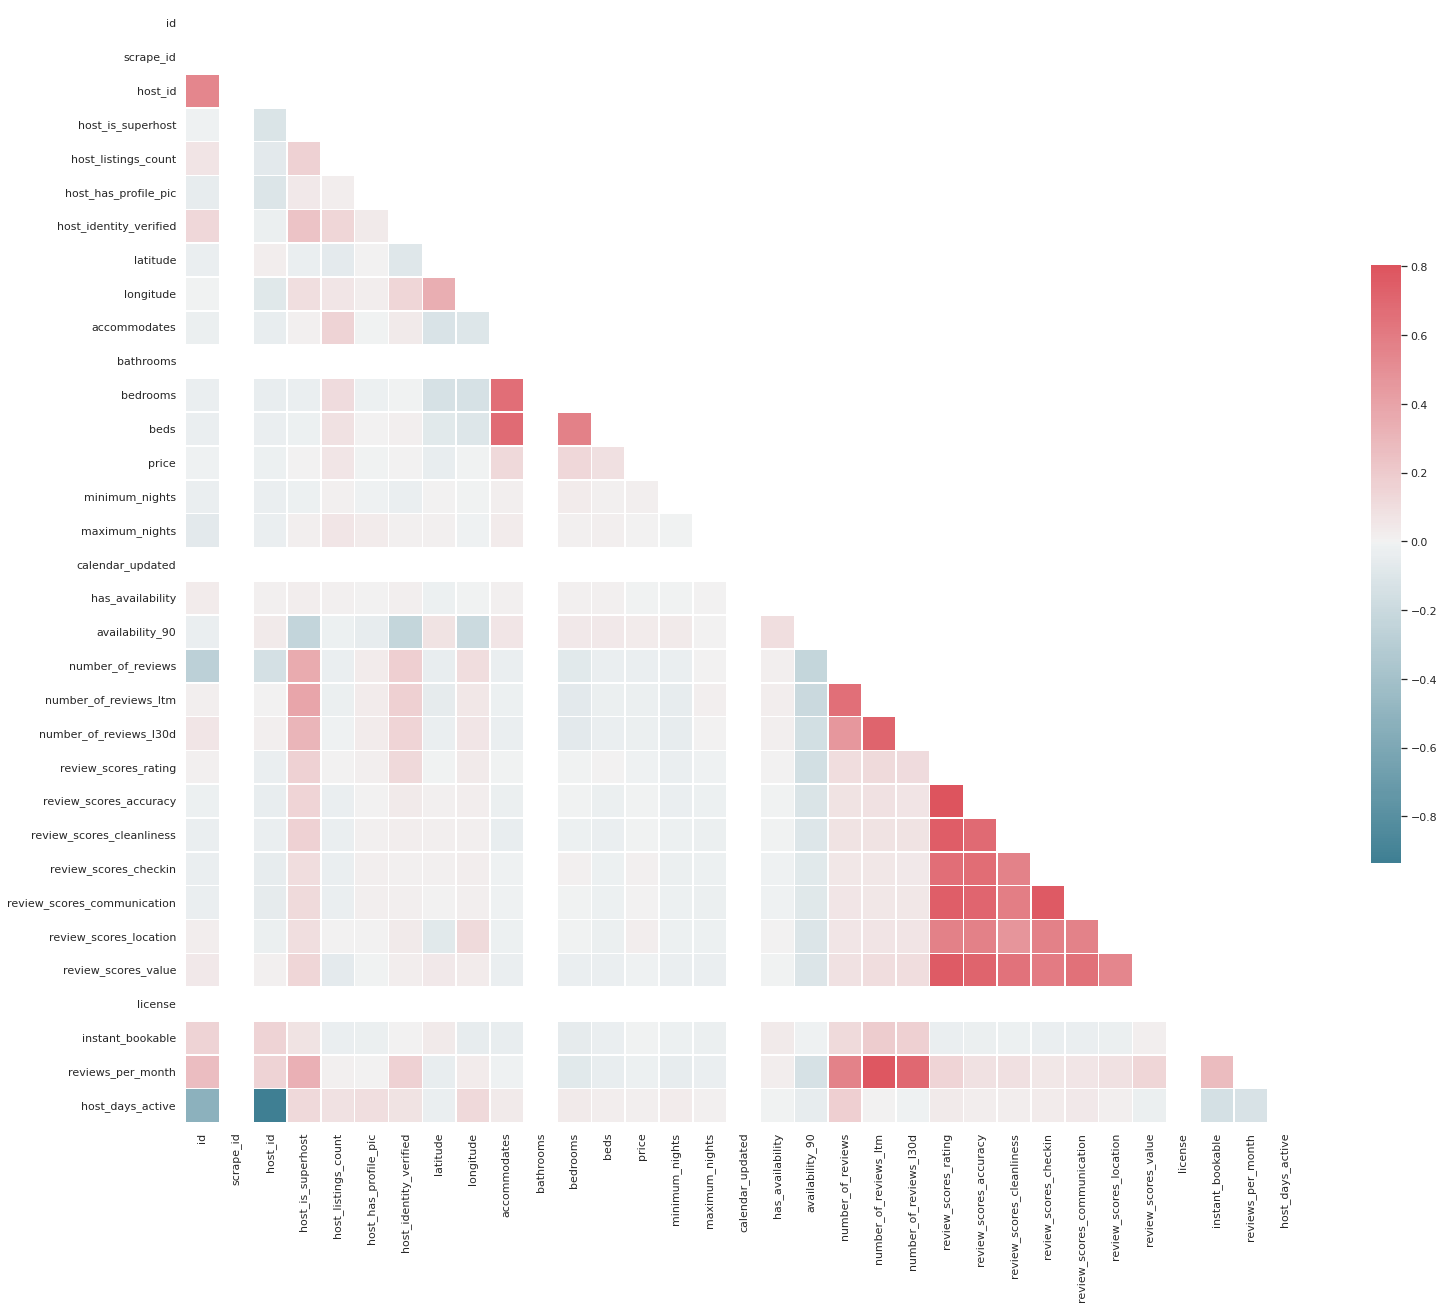

In [76]:
multi_collinearity_heatmap(df.drop(list(df.columns[df.columns.str.startswith('Neighbourhood')]), axis=1), figsize=(25,22))

#Predição

In [77]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [78]:
transformed_df = pd.get_dummies(df)
transformed_df.head()

,id,scrape_id,host_id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,...,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_last_review_0-2 weeks,time_since_last_review_1+ year,time_since_last_review_2-6 months,time_since_last_review_2-8 weeks,time_since_last_review_6-12 months
0,17878,20211224070558,68997,0.0,2.0,1.0,1.0,-22.96599,-43.17940,5,...,0,0,0,1,0,0,0,0,0,0
1,24480,20211224070558,99249,0.0,0.0,1.0,1.0,-22.98405,-43.20189,2,...,0,0,0,1,0,0,1,0,0,0
2,25026,20211224070558,102840,0.0,3.0,1.0,1.0,-22.97735,-43.19105,3,...,0,0,0,1,0,0,0,0,0,0
3,35636,20211224070558,153232,1.0,1.0,1.0,1.0,-22.98839,-43.19232,2,...,0,0,0,1,0,0,0,0,0,0
4,35764,20211224070558,153691,1.0,1.0,1.0,1.0,-22.98107,-43.19136,2,...,0,0,0,1,0,0,0,0,0,0


In [79]:
numerical_columns = ['accommodates', 'availability_90','host_days_active', 
                     'host_listings_count', 'maximum_nights', 'minimum_nights', 
                     'number_of_reviews', 'price']

In [80]:
feature_list_x = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
                'reviews_per_month',  'has_availability']
feature_list_y = ['price']

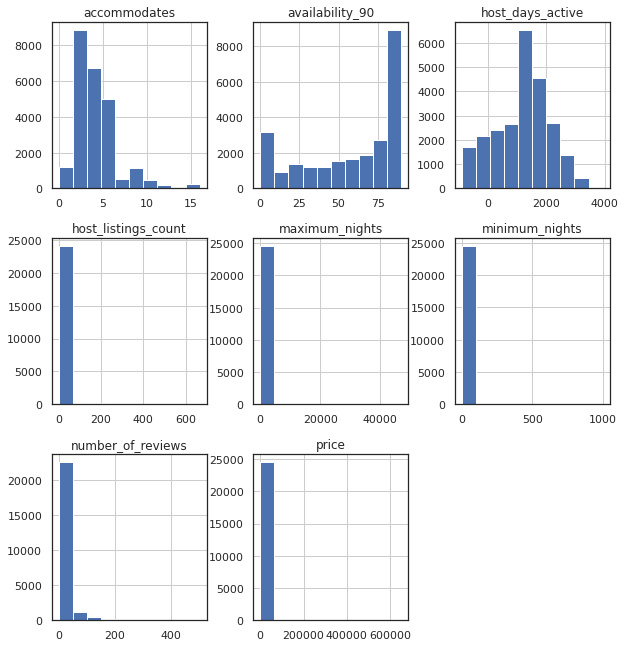

In [81]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [82]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns 
                     if i not in ['availability_90', 'host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    transformed_df[col] = df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

In [83]:
#transformed_df[numerical_columns].hist(figsize=(10,11));

In [ ]:
# Separating X and y
X = transformed_df.drop('price', axis=1)
y = transformed_df.price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [ ]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) 

In [ ]:
hpm_reg_start = time.time()

# Create instance of the model, `LinearRegression` function from 
# Scikit-Learn and fit the model on the training data:

hpm_reg = LinearRegression()  
hpm_reg.fit(X_train, y_train) #training the algorithm

# Now that the model has been fit we can make predictions by calling 
# the predict command. We are making predictions on the testing set:
training_preds_hpm_reg = hpm_reg.predict(X_train)
val_preds_hpm_reg = hpm_reg.predict(X_test)

hpm_reg_end = time.time()

print(f"Time taken to run: {round((hpm_reg_end - hpm_reg_start)/60,1)} minutes")

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, training_preds_hpm_reg),4))
print("Validation RMSE:", round(mean_squared_error(y_test, val_preds_hpm_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_hpm_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_hpm_reg),4))